In [10]:
import torch
from collections import OrderedDict

class Net4(torch.nn.Module):
    def __init__(self):
        super(Net4, self).__init__()
        self.conv = torch.nn.Sequential(
            OrderedDict(
                [
                    ("conv1", torch.nn.Conv2d(3, 32, 3, 1, 1)),
                    ("relu1", torch.nn.ReLU()),
                    ("pool", torch.nn.MaxPool2d(2))
                ]
            ))
 
        self.dense = torch.nn.Sequential(
            OrderedDict([
                ("dense1", torch.nn.Linear(32 * 3 * 3, 128)),
                ("relu2", torch.nn.ReLU()),
                ("dense2", torch.nn.Linear(128, 10))
            ])
        )
 
    def forward(self, x):
        conv_out = self.conv1(x)
        res = conv_out.view(conv_out.size(0), -1)
        out = self.dense(res)
        return out
 
model4 = Net4()
print(model4)

Net4(
  (conv): Sequential(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu1): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (dense): Sequential(
    (dense1): Linear(in_features=288, out_features=128, bias=True)
    (relu2): ReLU()
    (dense2): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [3]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
 
x = torch.unsqueeze(torch.linspace(-1,1,100),dim = 1)
#unsqueeze函数创建一个维度是1的向量
# linspace函数生成在-1到1之间的100个数
 
y = x**2+0.2*torch.rand(x.size())
#得到x自乘的矩阵，然后加上同x矩阵相同的噪声
 
# print(x,y,x.size())
#输出x，y矩阵，以及矩阵x的大小
 
x,y = Variable(x),Variable(y)
#将矩阵转化为 变量
 
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        #此步骤是官方要求
        self.hidden = torch.nn.Linear(n_feature,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)
 
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
net = Net(1,10,1)
print(net)


Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


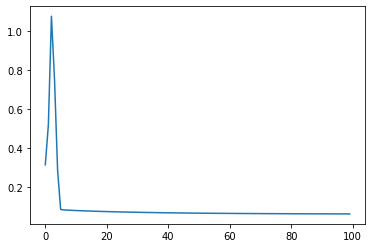

In [4]:
opt = torch.optim.SGD(net.parameters(),lr=0.5)
#设置学习率为0.5，用随机梯度下降发优化神经网络的参数
 
lossfunc = torch.nn.MSELoss()
#设置损失函数为均方损失函数，用来计算每次的误差
Loss=[]
for t in range(100):
#进行100次的优化
    prediction = net(x)
    #得到预测值
    loss=lossfunc(prediction,y)
    Loss.append(loss)
    #得到预测值与真实值之间的误差
    opt.zero_grad()
    #梯度清零
    loss.backward()
    #反向传播
    opt.step()
    #梯度优化
plt.plot(Loss)
plt.ioff()
plt.show()

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable as V

# import gym
# import gym.spaces
# import random
# gym.logger.set_level(gym.logger.ERROR)
import numpy as np
from collections import namedtuple
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import time
import matplotlib.pyplot as plt
from matplotlib import animation
from builtins import super
from IPython.display import display, Image